In [1]:
import copy
import os

import numpy as np

import coloradar_dataset_lib as ct
from scripts import demo_tools as demo

In [2]:
!ls /data/coloradar

ColoRadar_tools-master		 kitti
all-mar11.h5			 kitti.tar.xz
annz@arpg-brute.cs.colorado.edu  lidar_maps
bags				 map_360_33_120.pcd
binarize_cubes.py		 map_360_33_60.pcd
binarize_heatmaps.py		 one-mar11.h5
calib				 print_message.py
dataset.h5			 ros_output
dataset_may2_one.h5		 runs3-mar3.h5
extract_message.py		 test_output
extract_unprocessed_cubes.py	 two-mar11.h5
heatmaps2


### Initialize Dataset

In [3]:
COLORADAR_PATH = '/data/coloradar'
try:
    dataset = ct.ColoradarPlusDataset(COLORADAR_PATH)
except RuntimeError:
    dataset = ct.ColoradarDataset(COLORADAR_PATH)

print('Runs:', dataset.list_runs())

Runs: ['2_22_2021_longboard_run4', '2_23_2021_edgar_army_run2', '2_24_2021_aspen_run3', '2_28_2021_outdoors_run9', '2_28_2021_outdoors_run3', 'ec_hallways_run0', '2_23_2021_edgar_classroom_run2', '2_28_2021_outdoors_run7', '2_24_2021_aspen_run5', '2_24_2021_aspen_run7', '2_28_2021_outdoors_run2', '2_28_2021_outdoors_run5', '12_21_2020_ec_hallways_run3', '2_22_2021_longboard_run7', '2_22_2021_longboard_run3', '2_24_2021_aspen_run10', 'longboard_run0', '2_23_2021_edgar_army_run4', '2_23_2021_edgar_classroom_run1', '2_23_2021_edgar_army_run0', '2_24_2021_aspen_run8', '2_24_2021_aspen_run2', '12_21_2020_arpg_lab_run4', '2_28_2021_outdoors_run1', '12_21_2020_arpg_lab_run1', '2_24_2021_aspen_run4', '2_28_2021_outdoors_run0', '2_22_2021_longboard_run6', '2_23_2021_edgar_classroom_run4', '12_21_2020_arpg_lab_run3', '2_23_2021_edgar_classroom_run3', '2_24_2021_aspen_run0', '12_21_2020_ec_hallways_run2', '2_28_2021_outdoors_run8', '2_22_2021_longboard_run5', '2_24_2021_aspen_run11', '12_21_2020_

#### Initialize cascade radar config

In [4]:
radar_config = dataset.cascade_config()
print('Max radar range: ', radar_config.max_range())

Max radar range:  7.590000152587891


#### Look at a heatmap

In [5]:
run = dataset.get_run('2_28_2021_outdoors_run7')

In [7]:
hm_raw = run.get_cascade_heatmap(150)
hm_raw.shape

(1048576,)

In [9]:
hm_reshaped = hm_raw.reshape(radar_config.num_elevation_bins, radar_config.num_azimuth_bins, radar_config.n_range_bins(), 2)[:, :, :, 0]
hm_reshaped.shape

(32, 128, 128)

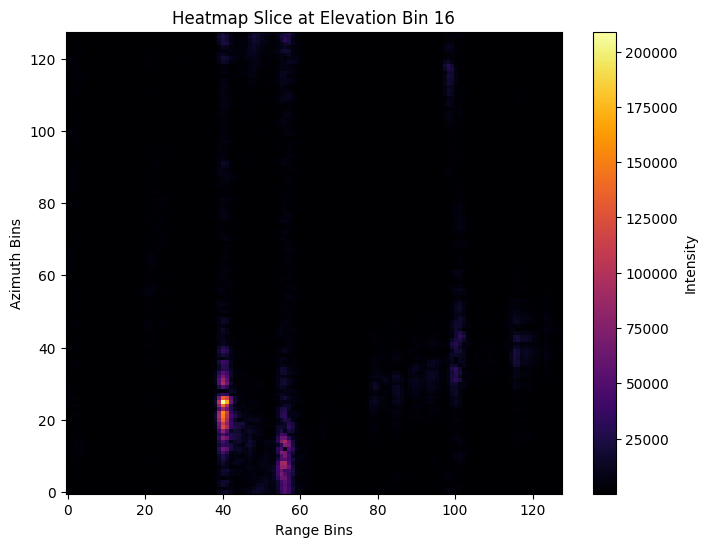

In [10]:
demo.show_heatmap_slice(hm_reshaped)

### Show Radar FOV Options

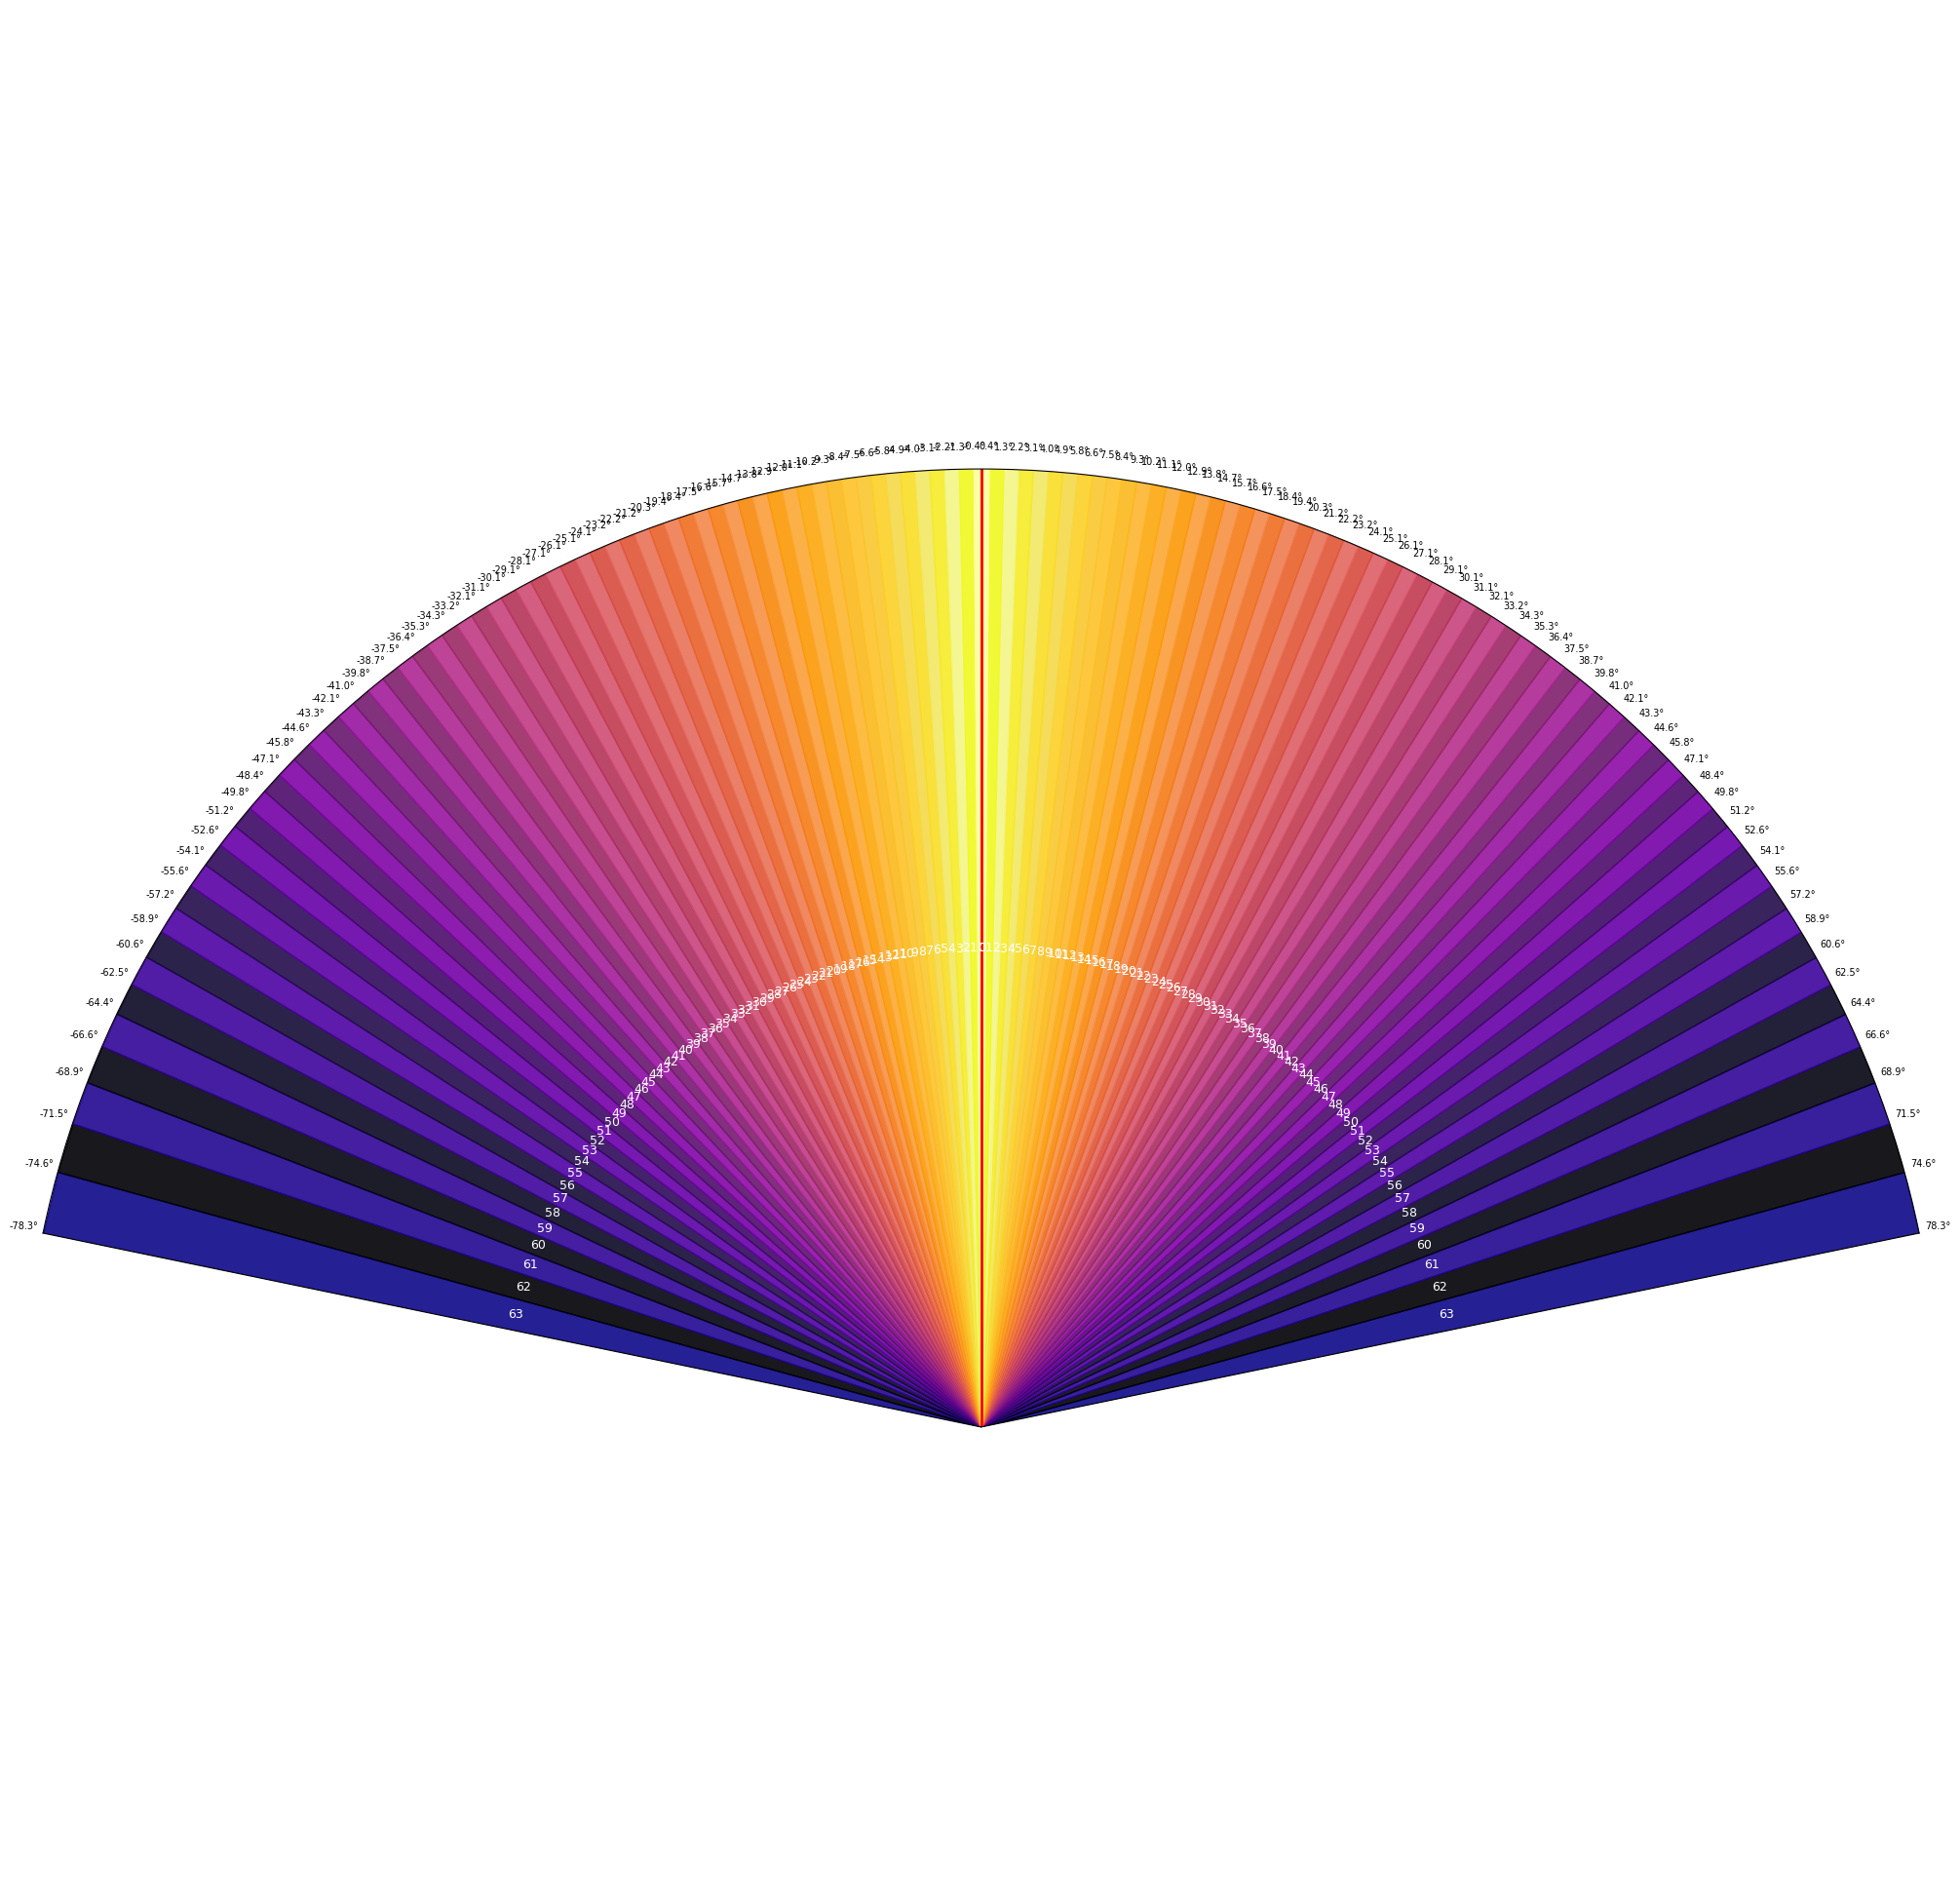

In [4]:
demo.display_azimuth_fov_options(radar_config)

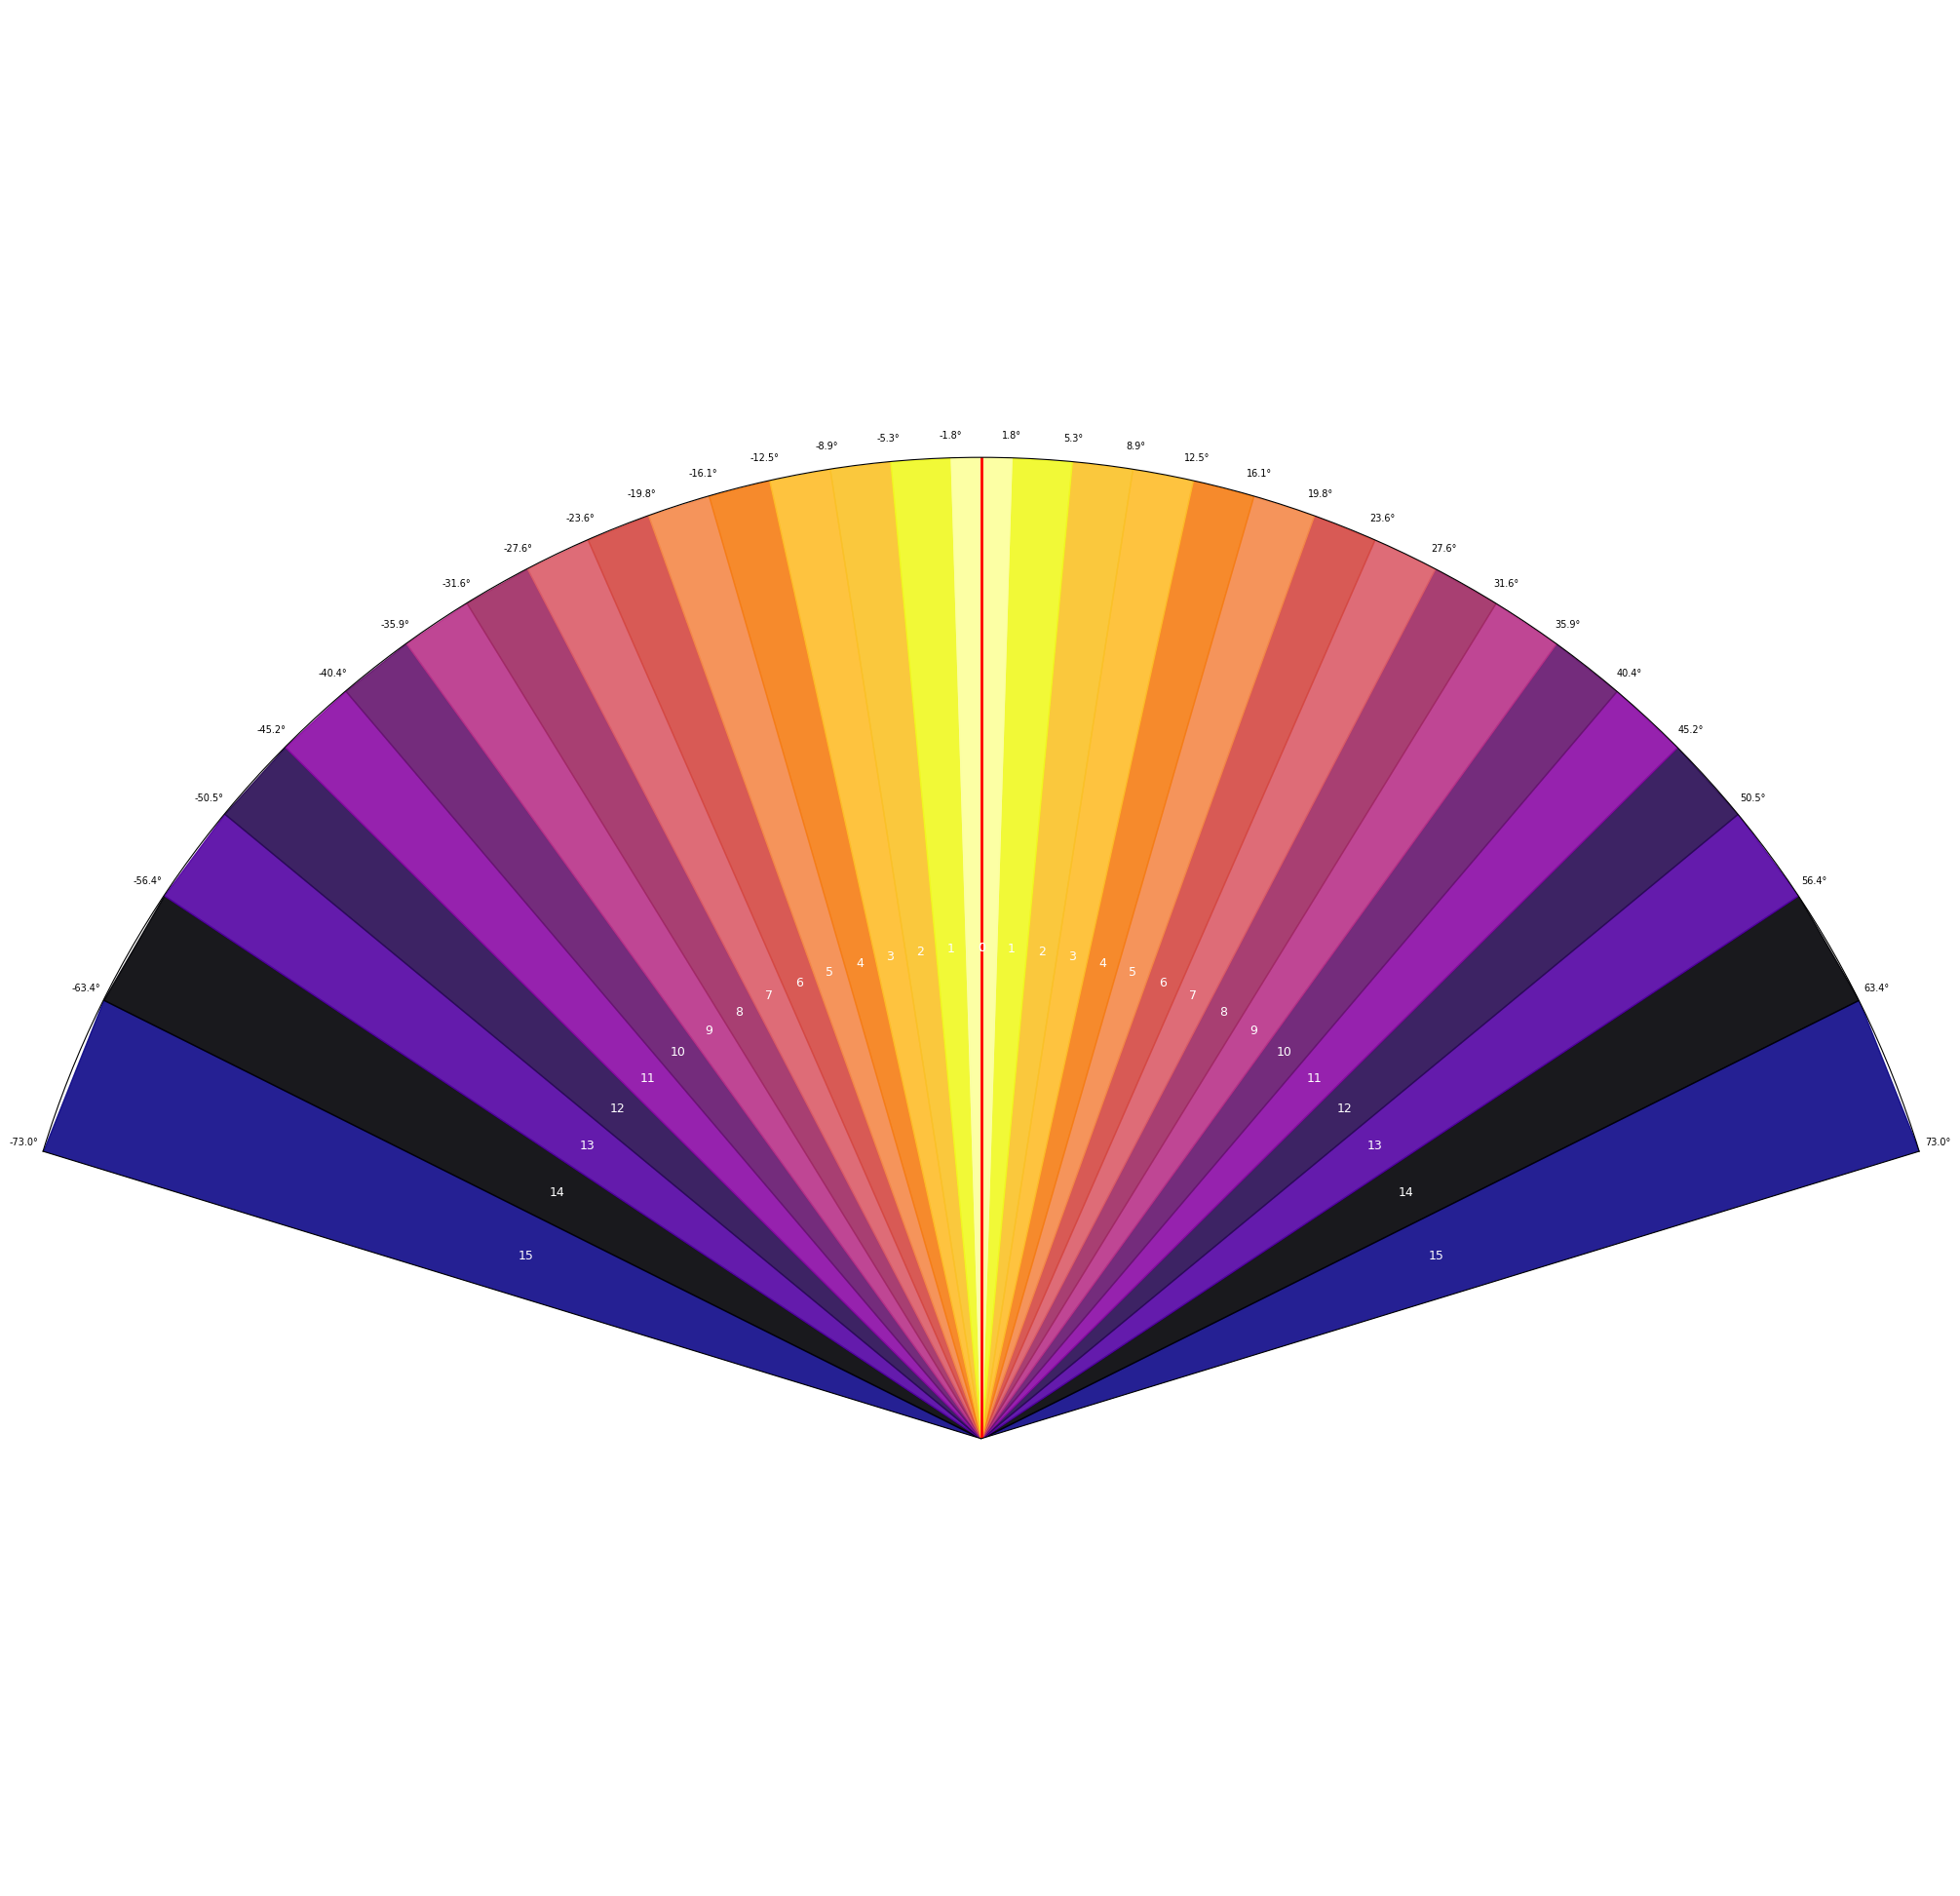

In [5]:
demo.display_elevation_fov_options(radar_config)

In [7]:
radar_config.azimuth_idx_to_fov_degrees(63)

156.64476013183594

In [11]:
radar_config.elevation_idx_to_fov_degrees(4)

32.233726501464844

In [20]:
radar_config.range_idx_to_range(127)

7.589682579040527

In [22]:
# !! WRONG, SHOULD BE 127 MAX
radar_config.range_to_range_idx(7)

119

In [17]:
radar_config.range_bin_width * radar_config.n_range_bins()

7.5896825790464

In [18]:
radar_config.n_range_bins()

128